In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df['not.fully.paid'].value_counts(normalize=True)

0    0.839946
1    0.160054
Name: not.fully.paid, dtype: float64

As we can see, the data is imbalance. Target value 0 is far more abundance than target value 1

### Predict 1: Keep the data as default

In [5]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [6]:
# import necessary package/module
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

In [7]:
# Create function to print classification report
def class_report(X, y, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    model = algo()
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print('Data Train\n')
    print(classification_report(y_train, y_pred_train))
    print('=========================================================')
    print('Data Test\n')
    print(classification_report(y_test, y_pred_test))

In [8]:
# data preparation
X = df.drop('not.fully.paid', axis=1)
# Change purpose columnt to numeric
X['purpose'] = X['purpose'].astype('category')
X['purpose'].cat.categories = [0, 1, 2, 3, 4, 5, 6]
y = df['not.fully.paid']

# Make feature and target that won't change
feature = df.drop('not.fully.paid', axis=1)
feature['purpose'] = feature['purpose'].astype('category')
feature['purpose'].cat.categories = [0, 1, 2, 3, 4, 5, 6]
target = df['not.fully.paid']

# classification report for data
print('LogisticRegression\n')
class_report(X, y, LogisticRegression)

# classification report for Decision Tree
print('Decision Tree\n')
class_report(X, y, DecisionTreeClassifier)

# Classification report for Random Forest
print('Random Forest\n')
class_report(X, y, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
class_report(X, y, GradientBoostingClassifier)

LogisticRegression

Data Train

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      6422
           1       0.41      0.02      0.04      1240

    accuracy                           0.84      7662
   macro avg       0.63      0.51      0.47      7662
weighted avg       0.77      0.84      0.77      7662

Data Test

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1623
           1       0.50      0.02      0.05       293

    accuracy                           0.85      1916
   macro avg       0.67      0.51      0.48      1916
weighted avg       0.80      0.85      0.78      1916

Decision Tree



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6422
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      7662
   macro avg       1.00      1.00      1.00      7662
weighted avg       1.00      1.00      1.00      7662

Data Test

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1623
           1       0.18      0.23      0.20       293

    accuracy                           0.72      1916
   macro avg       0.51      0.52      0.51      1916
weighted avg       0.75      0.72      0.73      1916

Random Forest



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Data Train

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      6422
           1       1.00      0.84      0.92      1240

    accuracy                           0.97      7662
   macro avg       0.98      0.92      0.95      7662
weighted avg       0.98      0.97      0.97      7662

Data Test

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.33      0.05      0.09       293

    accuracy                           0.84      1916
   macro avg       0.59      0.52      0.50      1916
weighted avg       0.77      0.84      0.79      1916

Gradient Boosting

Data Train

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      6422
           1       0.94      0.09      0.17      1240

    accuracy                           0.85      7662
   macro avg       0.90      0.55      0.54      7662
weighted avg       0

The results from all models, has bad recall for target value 1. This is not what we want. We want to have a model that has good recal on 1.

### Handling the Imbalance Data

#### 1. Handling with undersampling

In [9]:
# split data frame to not fully paid = 1 and not fully paid = 0
nfp_0 = df[df['not.fully.paid'] == 0]
nfp_1 = df[df['not.fully.paid'] == 1]

# balancing number of nfp_0
sample_nfp_0 = nfp_0.sample(len(nfp_1))

# Concat sample_nfp_0 and nfp_1 : df_under
df_under = pd.concat([nfp_1, sample_nfp_0], ignore_index=True)

In [10]:
# Data preparation for df_under
X = df_under.drop('not.fully.paid', axis=1)
# Change purpose columnt to numeric
X['purpose'] = X['purpose'].astype('category')
X['purpose'].cat.categories = [0, 1, 2, 3, 4, 5, 6]
y = df_under['not.fully.paid']

In [11]:
# classification report for Logistic Regression
print(color.RED + 'LogisticRegression' + color.END + '\n')
class_report(X, y, LogisticRegression)

# classification report for Decision Tree
print(color.RED + 'Decision Tree' + color.END + '\n')
class_report(X, y, DecisionTreeClassifier)

# Classification report for Random Forest
print(color.RED + 'Random Froest' + color.END + '\n')
class_report(X, y, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
class_report(X, y, GradientBoostingClassifier)

LogisticRegression

Data Train

              precision    recall  f1-score   support

           0       0.58      0.64      0.61      1233
           1       0.59      0.53      0.56      1219

    accuracy                           0.59      2452
   macro avg       0.59      0.59      0.58      2452
weighted avg       0.59      0.59      0.58      2452

Data Test

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       300
           1       0.62      0.53      0.57       314

    accuracy                           0.59       614
   macro avg       0.60      0.59      0.59       614
weighted avg       0.60      0.59      0.59       614

Decision Tree



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      1.00      1.00      1219

    accuracy                           1.00      2452
   macro avg       1.00      1.00      1.00      2452
weighted avg       1.00      1.00      1.00      2452

Data Test

              precision    recall  f1-score   support

           0       0.52      0.55      0.54       300
           1       0.55      0.52      0.53       314

    accuracy                           0.53       614
   macro avg       0.53      0.53      0.53       614
weighted avg       0.53      0.53      0.53       614

Random Froest

Data Train


C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1233
           1       0.99      0.97      0.98      1219

    accuracy                           0.98      2452
   macro avg       0.99      0.98      0.98      2452
weighted avg       0.99      0.98      0.98      2452

Data Test

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       300
           1       0.58      0.44      0.50       314

    accuracy                           0.55       614
   macro avg       0.56      0.55      0.55       614
weighted avg       0.56      0.55      0.54       614

Gradient Boosting

Data Train

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1233
           1       0.75      0.76      0.75      1219

    accuracy                           0.75      2452
   macro avg       0.75      0.75      0.75      2452
weighted avg       0.75      0.

The undersampling method to overcome imbalance problem did increase model performance. Let's take a look others method to solve imbalance problem 

#### 2. Handling with Oversampling

a. Random Oversampling from first data

In [12]:
# import necessary modules/packages
from imblearn.over_sampling import RandomOverSampler, SMOTE

# initiate object RandomOverSampler: ros
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(feature, target)

# create data frame for data that has been transformed
df_all_os = pd.DataFrame(X_ros, columns=feature.columns)
df_all_os['not.fully.paid'] = y_ros

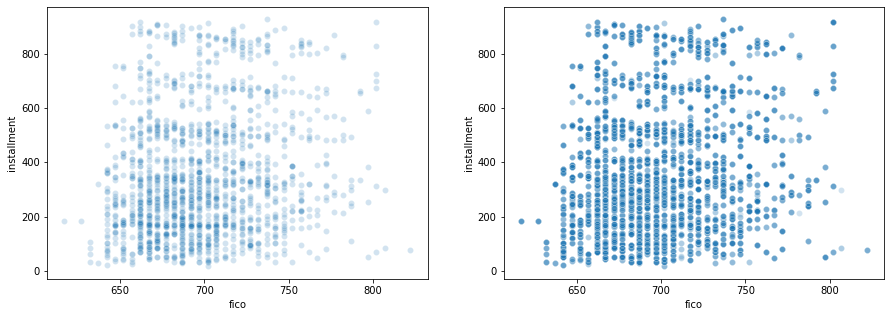

In [13]:
# Get intuition about over sampling
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df[df['not.fully.paid'] == 1], x='fico', y='installment', alpha=0.2)
plt.subplot(1,2,2)
sns.scatterplot(data=df_all_os[df_all_os['not.fully.paid'] == 1], x='fico', y='installment', alpha=0.2)
plt.show()

In [14]:
# classification report for Logistic Regression
print(color.RED + 'LogisticRegression' + color.END + '\n')
class_report(X_ros, y_ros, LogisticRegression)

# classification report for Decision Tree
print(color.RED + 'Decision Tree' + color.END + '\n')
class_report(X_ros, y_ros, DecisionTreeClassifier)

# Classification report for Random Forest
print(color.RED + 'Random Froest' + color.END + '\n')
class_report(X_ros, y_ros, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
class_report(X_ros, y_ros, GradientBoostingClassifier)

LogisticRegression



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Train

              precision    recall  f1-score   support

           0       0.59      0.66      0.63      6473
           1       0.61      0.54      0.57      6399

    accuracy                           0.60     12872
   macro avg       0.60      0.60      0.60     12872
weighted avg       0.60      0.60      0.60     12872

Data Test

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      1572
           1       0.62      0.54      0.58      1646

    accuracy                           0.60      3218
   macro avg       0.60      0.60      0.60      3218
weighted avg       0.60      0.60      0.60      3218

Decision Tree

Data Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6473
           1       1.00      1.00      1.00      6399

    accuracy                           1.00     12872
   macro avg       1.00      1.00      1.00     12872
weighted avg       1.00 

C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Data Train

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6473
           1       1.00      1.00      1.00      6399

    accuracy                           1.00     12872
   macro avg       1.00      1.00      1.00     12872
weighted avg       1.00      1.00      1.00     12872

Data Test

              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1572
           1       0.94      0.98      0.96      1646

    accuracy                           0.96      3218
   macro avg       0.96      0.96      0.96      3218
weighted avg       0.96      0.96      0.96      3218

Gradient Boosting

Data Train

              precision    recall  f1-score   support

           0       0.71      0.71      0.71      6473
           1       0.71      0.70      0.70      6399

    accuracy                           0.71     12872
   macro avg       0.71      0.71      0.71     12872
weighted avg       0

It is not a good idea to oversampling in the dataset. Because it will make many datas duplicate that occur in the train and test data. The best practice is to oversampling the train dataset

b. Random over sampling only the train data

In [15]:
def train_random_os(feature, target, algo):
    X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=101)
    
    # initiate object RandomOverSampler: ros
    ros = RandomOverSampler()
    X_ros, y_ros = ros.fit_sample(X_train, y_train)
    
    model = algo()
    model.fit(X_ros, y_ros)
    
    y_pred = model.predict(X_test)
    
    print('=========================================================')
    print('Data Test\n')
    print(classification_report(y_test, y_pred))

In [16]:
# classification report for Logistic Regression
print(color.RED + 'LogisticRegression' + color.END + '\n')
train_random_os(feature, target, LogisticRegression)

# classification report for Decision Tree
print(color.RED + 'Decision Tree' + color.END + '\n')
train_random_os(feature, target, DecisionTreeClassifier)

# Classification report for Random Forest
print(color.RED + 'Random Froest' + color.END + '\n')
train_random_os(feature, target, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
train_random_os(feature, target, GradientBoostingClassifier)

LogisticRegression



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.88      0.64      0.74      1623
           1       0.21      0.53      0.30       293

    accuracy                           0.62      1916
   macro avg       0.54      0.58      0.52      1916
weighted avg       0.78      0.62      0.67      1916

Decision Tree

Data Test

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1623
           1       0.19      0.22      0.20       293

    accuracy                           0.74      1916
   macro avg       0.52      0.53      0.52      1916
weighted avg       0.75      0.74      0.75      1916

Random Froest



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1623
           1       0.23      0.08      0.11       293

    accuracy                           0.82      1916
   macro avg       0.54      0.51      0.51      1916
weighted avg       0.76      0.82      0.78      1916

Gradient Boosting

Data Test

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1623
           1       0.24      0.55      0.34       293

    accuracy                           0.67      1916
   macro avg       0.57      0.62      0.56      1916
weighted avg       0.79      0.67      0.71      1916



#### 3. Handling with SMOTE (Synthetic Minority Over Sampling)

In [17]:
# Initiate SMOTE object
smote = SMOTE(random_state=101)

# fit_sample of feature and target
X_smote, y_smote = smote.fit_sample(feature, target)

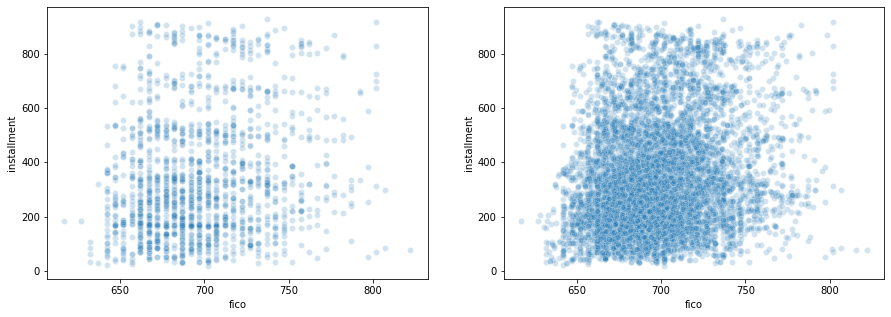

In [18]:
# create data frame for data that has been transformed
df_smote = pd.DataFrame(X_smote, columns=feature.columns)
df_smote['not.fully.paid'] = y_smote

# Get intuition about smote
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.scatterplot(data=df[df['not.fully.paid'] == 1], x='fico', y='installment', alpha=0.2)
plt.subplot(1,2,2)
sns.scatterplot(data=df_smote[df_smote['not.fully.paid'] == 1], x='fico', y='installment', alpha=0.2)
plt.show()

In [19]:
def class_report_smote_all(X, y, algo):
    
    # Initiate SMOTE object
    smote = SMOTE(random_state=101)

    # fit_sample of feature and target
    X_smote, y_smote = smote.fit_sample(X, y)
    
    X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=101)
    
    model = algo()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    print('=========================================================')
    print('Data Test\n')
    print(classification_report(y_test, y_pred))

In [20]:
def class_report_smote_train(X, y, algo):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    
    # Initiate SMOTE object
    smote = SMOTE(random_state=101)

    # fit_sample of feature and target
    X_smote, y_smote = smote.fit_sample(X_train, y_train)
    
    model = algo()
    model.fit(X_smote, y_smote)
    
    y_pred = model.predict(X_test)
    
    print('=========================================================')
    print('Data Test\n')
    print(classification_report(y_test, y_pred))

In [21]:
# classification report for Logistic Regression
print(color.RED + 'LogisticRegression' + color.END + '\n')
class_report_smote_all(feature, target, LogisticRegression)

# classification report for Decision Tree
print(color.RED + 'Decision Tree' + color.END + '\n')
class_report_smote_all(feature, target, DecisionTreeClassifier)

# Classification report for Random Forest
print(color.RED + 'Random Froest' + color.END + '\n')
class_report_smote_all(feature, target, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
class_report_smote_all(feature, target, GradientBoostingClassifier)

LogisticRegression



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.58      0.66      0.62      1572
           1       0.63      0.55      0.59      1646

    accuracy                           0.61      3218
   macro avg       0.61      0.61      0.60      3218
weighted avg       0.61      0.61      0.60      3218

Decision Tree

Data Test

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1572
           1       0.82      0.82      0.82      1646

    accuracy                           0.82      3218
   macro avg       0.82      0.82      0.82      3218
weighted avg       0.82      0.82      0.82      3218

Random Froest



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.80      0.95      0.87      1572
           1       0.94      0.77      0.85      1646

    accuracy                           0.86      3218
   macro avg       0.87      0.86      0.86      3218
weighted avg       0.87      0.86      0.86      3218

Gradient Boosting

Data Test

              precision    recall  f1-score   support

           0       0.79      0.98      0.88      1572
           1       0.97      0.76      0.85      1646

    accuracy                           0.87      3218
   macro avg       0.88      0.87      0.86      3218
weighted avg       0.89      0.87      0.86      3218



SMOTE all the dataset gave us good model performance. However, it is also not a good practice to smote all the dataset. We should only smote the train dataset.

In [22]:
# classification report for Logistic Regression
print(color.RED + 'LogisticRegression' + color.END + '\n')
class_report_smote_train(feature, target, LogisticRegression)

# classification report for Decision Tree
print(color.RED + 'Decision Tree' + color.END + '\n')
class_report_smote_train(feature, target, DecisionTreeClassifier)

# Classification report for Random Forest
print(color.RED + 'Random Froest' + color.END + '\n')
class_report_smote_train(feature, target, RandomForestClassifier)

# Classification report for Gradient Boosting
print(color.RED + 'Gradient Boosting' + color.END + '\n')
class_report_smote_train(feature, target, GradientBoostingClassifier)

LogisticRegression



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.88      0.65      0.75      1623
           1       0.21      0.52      0.30       293

    accuracy                           0.63      1916
   macro avg       0.55      0.58      0.52      1916
weighted avg       0.78      0.63      0.68      1916

Decision Tree

Data Test

              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1623
           1       0.21      0.28      0.24       293

    accuracy                           0.73      1916
   macro avg       0.54      0.54      0.54      1916
weighted avg       0.76      0.73      0.74      1916

Random Froest



C:\Users\Elga Ridho Maulana\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Data Test

              precision    recall  f1-score   support

           0       0.86      0.96      0.90      1623
           1       0.30      0.11      0.16       293

    accuracy                           0.83      1916
   macro avg       0.58      0.53      0.53      1916
weighted avg       0.77      0.83      0.79      1916

Gradient Boosting

Data Test

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      1623
           1       0.33      0.06      0.11       293

    accuracy                           0.84      1916
   macro avg       0.59      0.52      0.51      1916
weighted avg       0.77      0.84      0.79      1916



c. Handling with class weight

Handling with **Decision Tree**

In [23]:
target.value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

**min_samples_leaf** : number minimal samples in each leaf <br>
**min_samples_split**: number minimal samples before reach leaf

In [24]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, random_state=101)

In [25]:
dtree = DecisionTreeClassifier(min_samples_leaf=50, class_weight={0:1, 1:8}, random_state=101)
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.44      0.59      2029
           1       0.18      0.68      0.28       366

    accuracy                           0.48      2395
   macro avg       0.53      0.56      0.44      2395
weighted avg       0.78      0.48      0.54      2395



With class_weight we can specify how much the one label is weighted than other label. In this case, we specify 1 label to be 8 and label 0 to 1. 

Handling with **Random Forest**

In [33]:
rfc = RandomForestClassifier(n_estimators=100, class_weight={0:1, 1:7}, min_samples_leaf=50, random_state=101)

In [34]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 7},
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=50,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=101, verbose=0, warm_start=False)

In [35]:
y_pred3 = rfc.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65      2029
           1       0.20      0.69      0.31       366

    accuracy                           0.53      2395
   macro avg       0.55      0.60      0.48      2395
weighted avg       0.79      0.53      0.60      2395

